# A Quick Refresher on AB Testing: Frequentist and Bayesian Methods
---
### Summary: 
A/B Testing is a ubiquitous topic in the field of data science, and is commonly observed in the business context when product design is approached from a data driven perspective. Companies like Meta, Amazon, and Netflix all employ A/B testing to make data-driven decisions in designing their products. 

The business question we are often seeking to answer with the A/B test is:
> How do I make a decision in designing/marketing my product, using data and the scientific method?

In fact, A/B testing is not a new concept in classical statistics, and may be more familiarly called as a 'randomized control experiment' - a quintessential example of one which might be the way scientists test to see the effectiveness of a new drug. 

One might imagine how the process for setting up such an experiment (to test the efficacy of a drug) would look like:
1. Recruit a sample population of willing participants for testing the new drug
2. Randomly administer a placebo to half of the sample population (the 'control' group) and the new drug to the other half (the 'treatment' group)
3. Wait and see what happens
4. Statistically analyze the results of the control and treatment groups, and draw conclusions on the effectiveness of the drug

An experimentation framework like the one above is a valuable method for answering business questions related to product design, marketing strategies, etc. For example, an App developer may employ an A/B test to determine which of two User Interface designs is more likely to elicit a click from the user (and therefore lead to better business outcomes). 

Although A/B testing is a powerful tool to derive insights when making ambiguous business decisions, as with anything related to data science, successful application of A/B testing requires a commitment to getting the details right. 

### Objective for this Notebook: 
In this notebook we zoom in on the technical aspects of designing an A/B test experiment:
* We will start off by briefly going over the fundamental theory behind a two-sample t-test on the difference in means (Welch's T-Test)
* Then we will use select two sample populations generated from different Gamma distributions, and actually perform a two-sample test on the means
    * We use this test to investigate the effects of the choice for the experiment's sample size on the power of the test
* In addition, we review some more commonly observed hypothesis testing methods such as Bayesian hypothesis testing

### Challenges:

The big idea behind the A/B test sounds quite simple, but designing and executing such an experiment in real-life business environments can be incredibly technically challenging:
* Technical details such as determining the right sample size can be a challenge
    * Greater sample sizes have greater 'power' in their test (i.e. lead to more statistically certain conclusions), but achieving this sample size for the experiment may not be feasible due to cost, time, or other practical reasons  
* Ensuring independence across observations can be tough, when users all coexist in the same environment
    * e.g. a rideshare App developer such as Uber may wish to measure the effect of a new feature in a particular city. However, the very act of testing the feature on the treatment group is expected to spill over to the control group, because everyone uses the same app. 
* Primacy/Novelty effects may interfere with the treatment effect
    * Other effects unrelated to the applied treatment (e.g. 'newness' or resistance to change) may contaminate the results of the test

In [1]:
# Motivating Example from Uber
from IPython.display import YouTubeVideo
YouTubeVideo('j5DoJV5S2Ao&t=895s')

### A General A/B Testing Framework:
A process flow such as the one below may be used to summarize the general steps in an A/B test. 

Many of these steps requires input from business stakeholders, and decisions can often require a tradeoff between practical considerations versus statistical considerations:
1. Choosing the Key Metric
    * This should be a measurable metric, which is tied to the overall business objective (i.e. increase revenue)
    * A typical metric is the conversion rate, average revenue per customer, cost per conversion, etc. 
2. Identify Variants
    * In an A/B test we have two variants (i.e. the control and treatment) 
    * The only difference between the two variants should be the treatment effect
3. Randomization Unit
    * Identify the lowest level unit at which the key metric is going to be measured (e.g. unique userid's)
    * An independence assumption must hold across observations of outcomes for the randomization units 
4. Experiment Design
    * This step involves setting the parameters for the experiment (the significance level, power, and MDE)
    * A ramp-up deployment strategy should be considered to control for primacy/novelty effects
5. Interpret Results
    * Once we have the results of the test, make an assessment on whether to roll out the new feature or not based on the statistical and practical significance of the outcomes

###  Assumptions:
* Independence across observations in the experiment

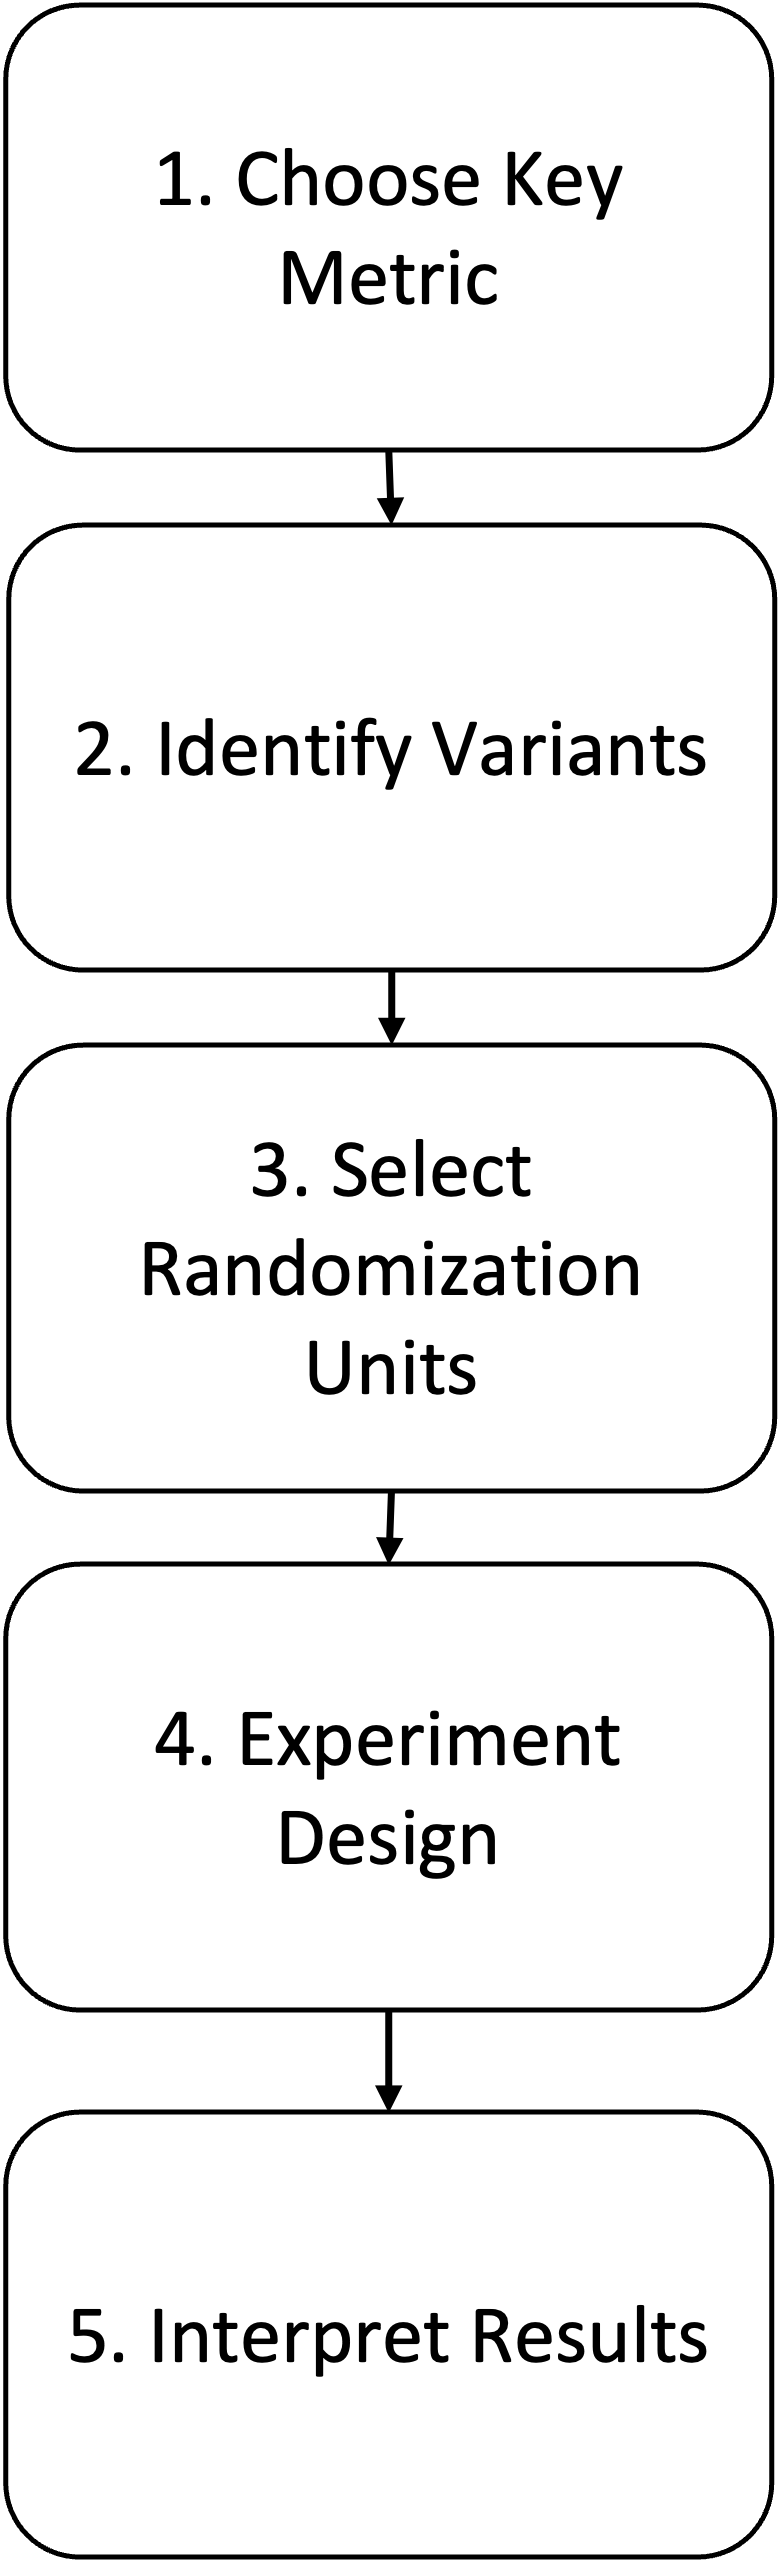

In [2]:
from IPython.display import Image
Image(filename="ab_testing_process_flow.png", width=200, height = 600)

---
# Zoom in On Step 4: Designing the Experiment and Selecting the Parameters


In a typical A/B test we may have a scenario in which 


Fundamentals and the Central Limit Theorem (CLT)


Let's say we want to detect the difference in the means between Sample A and Sample B, with the following parameters:
* Power ($\beta$) = 90%
* Significance ($\alpha$) = 0.05%
* Minimum Detectable Effect ($\Delta d$) = 0.125

And we wish to test the following two-sided experiment, with a Minimum Detectable Effect of 0.125 and a Power of 90% at a 5% significance level:
$$
\begin{align}
H_0:& \mu_A = \mu_B \\
H_1:& \mu_A \ne \mu_B
\end{align}
$$

Now our question turns to "What sample size do I need?"

---
## Definition of Significance Level and Power 

The **significance level** is the probability of a Type I error (i.e. the probability of rejecting the null hypothesis when it is actually true)

The **power** is $(1-\beta)$ where $\beta$ is the probability of a Type II error
* i.e. the probability of correctly rejecting the null hypothesis when the alternative is true

$$
\begin{align}
\text{significance level} &= P(\text{Reject $H_0$} | H_0 = True) \\
\beta &= P(\text{Fail to Reject $H_0$} | H_1 = True) \\
\text{Power} &= P(\text{Reject $H_0$} | H_1 = True)
\end{align}
$$

It is more intuitive to understand the significance and power visually, after selecting the test statistic for the two-sample hypothesis test.

### Test Statistic (Welch's T-test): 

$$
\begin{align}
t = \dfrac{\bar{X}_A - \bar{X}_B}{\sqrt{ \frac{s^2_A}{N_A} + \frac{s^2_B}{N_B}}}
\end{align}
$$

The Welch's t-test is used when we are comparing sample means from two populations which may not have the same variance and/or sample size. 


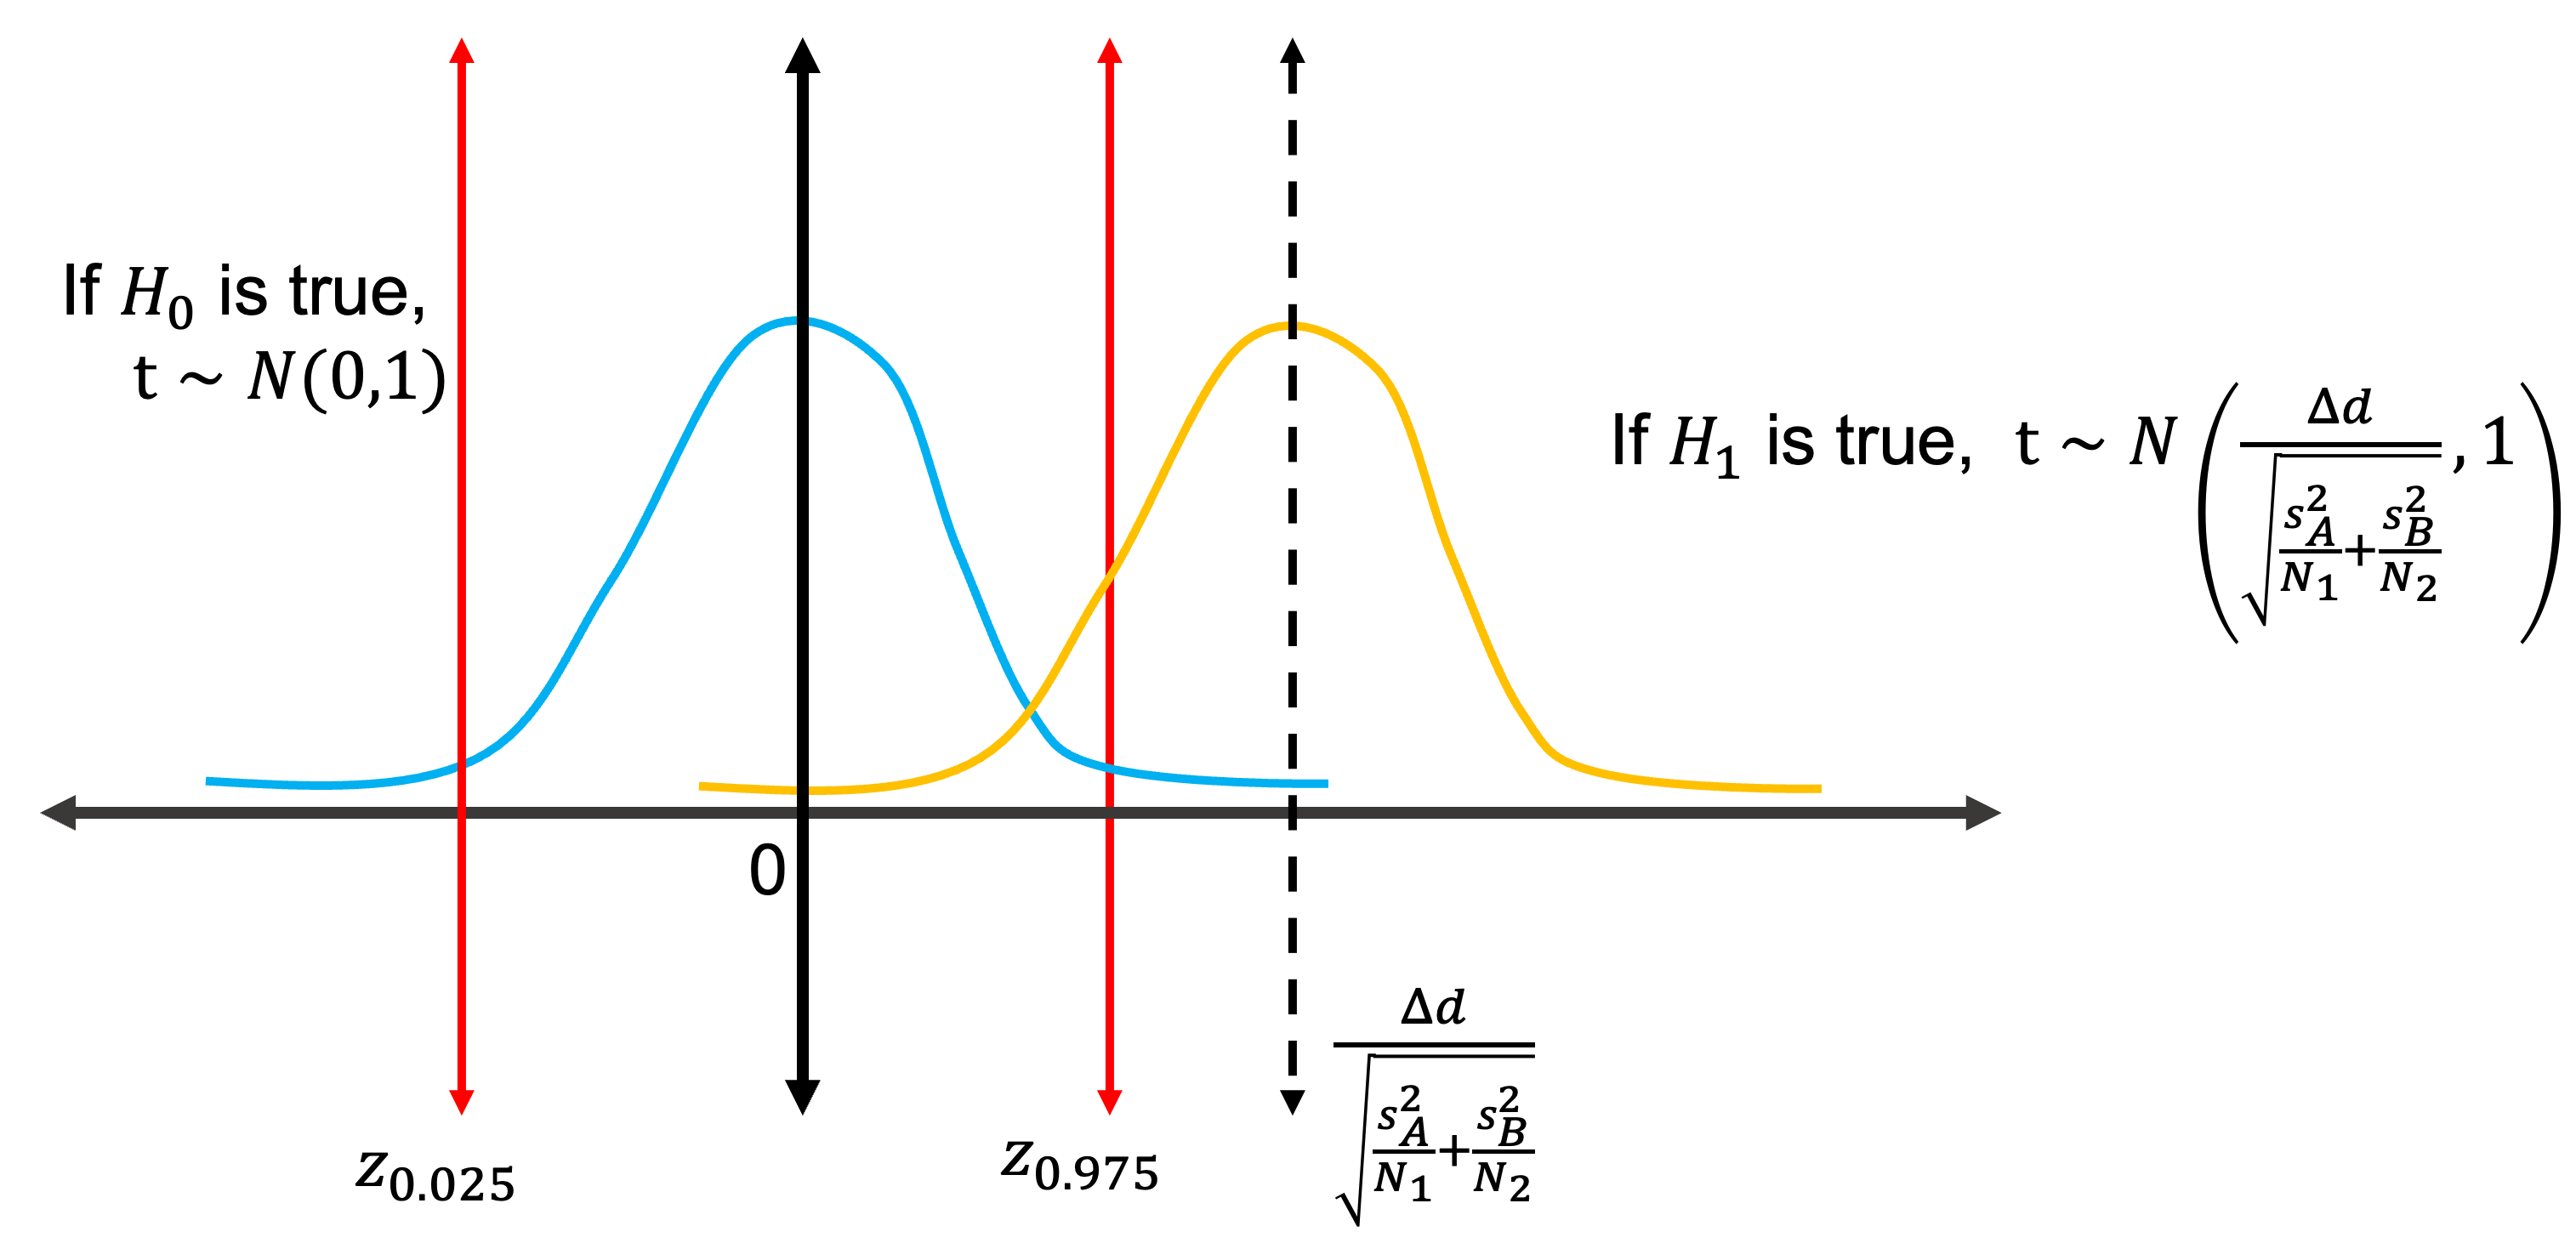

In [3]:
from IPython.display import Image
Image(filename="ab_testing_figure1.png", width=800, height = 400)

### Type I Error
Under our null hypothesis $H_0: \mu_A=\mu_B$, if we assumed that the null hypothesis is true, then we would expect that the test statistic follows a standard normal distribution (depicted with the blue bell curve in the figure). 

$$
\begin{align}
t \sim N(0, 1)
\end{align}
$$

Under this assumption in our two-sided experiment, we would conclude that a difference in means is not significant if the test statistic falls within the 95% confidence interval range $ t \in (z_{0.025}, z_{0.975})$, which in the figure above is indicated with the two red vertical lines. 

$$
\begin{align}
z_{0.025} &= \Phi^{1}(0.025) \approx -1.96 \\
z_{0.975} &= \Phi^{-1}(0.975) \approx 1.96
\end{align}
$$

In [4]:
from scipy.stats import norm

""" Getting the Critical Values for a Two-Sided Hypothesis with 5% Significance Level """
critical_level_lower = norm.ppf(0.025).round(decimals=6) # z_0.025
critical_level_upper = norm.ppf(0.975).round(decimals=6) # z_0.975

print(f"Critical Level Lower: {critical_level_lower} \n Critical Level Upper: {critical_level_upper}")

Critical Level Lower: -1.959964 
 Critical Level Upper: 1.959964


Alternatively, if the test statistic falls outside of the red vertical lines, then we would reject the null hypothesis - even if it is actually true. 

The probability of rejecting the null hypothesis when the hypothesis is actually true is called the Type I error probability, or the *significance level*. 

$$
\begin{align}
P(\text{Type I Error}) &= P(\text{Reject }H_0 | H_0 = True) \\
&= \text{Area Underneath Blue Curve $\cap$ Area Outside Critical Values} \\
&= \alpha 
\end{align}
$$

We have full control of the Type I Error probability when conducting our experiment because it is determined by our choice of the significance level parameter.

### Type II Error

However, if the the null hypothesis ($H_0: \mu_A = \mu_B$) is false, and the alternative hypothesis is true ($H_1: \mu_A \ne \mu_B$), then we can have a situation where the mean of the two populations are different by an amount $\Delta d$.

\begin{align}
 \mu_A = \mu_B + \Delta d
\end{align}

In which case we would expect that the test statistic is not centered at zero (e.g. it may be off to the right like the orange curve in the figure above).

$$
\begin{align}
t \sim N \left(\dfrac{\Delta d}{\sqrt{ \dfrac{s^2_A}{N_A} + \dfrac{s^2_B}{N_B}}}, 1 \right)
\end{align}
$$

The Type II error probability is the probability that the test statistics falls within the critical thresholds, under the condition that $H_1 = True$:

$$
\begin{align}
P(\text{Type II Error}) &= P(\text{Fail to Reject }H_0 | H_1 = True) \\
&= \text{Area Underneath Orange Curve $\cap$ Area Between Critical Values} \\
&= \beta
\end{align}
$$

Since we would not know where the orange curve in the figure above actually is when conducting a real experiment (i.e. we do not know the true population means of sample A and sample B before doing the experiment), the Type II error probability is not known beforehand. 

### Summing it All Up

All of the potential results from the experiment can be summed in a *confusion matrix* as presented below

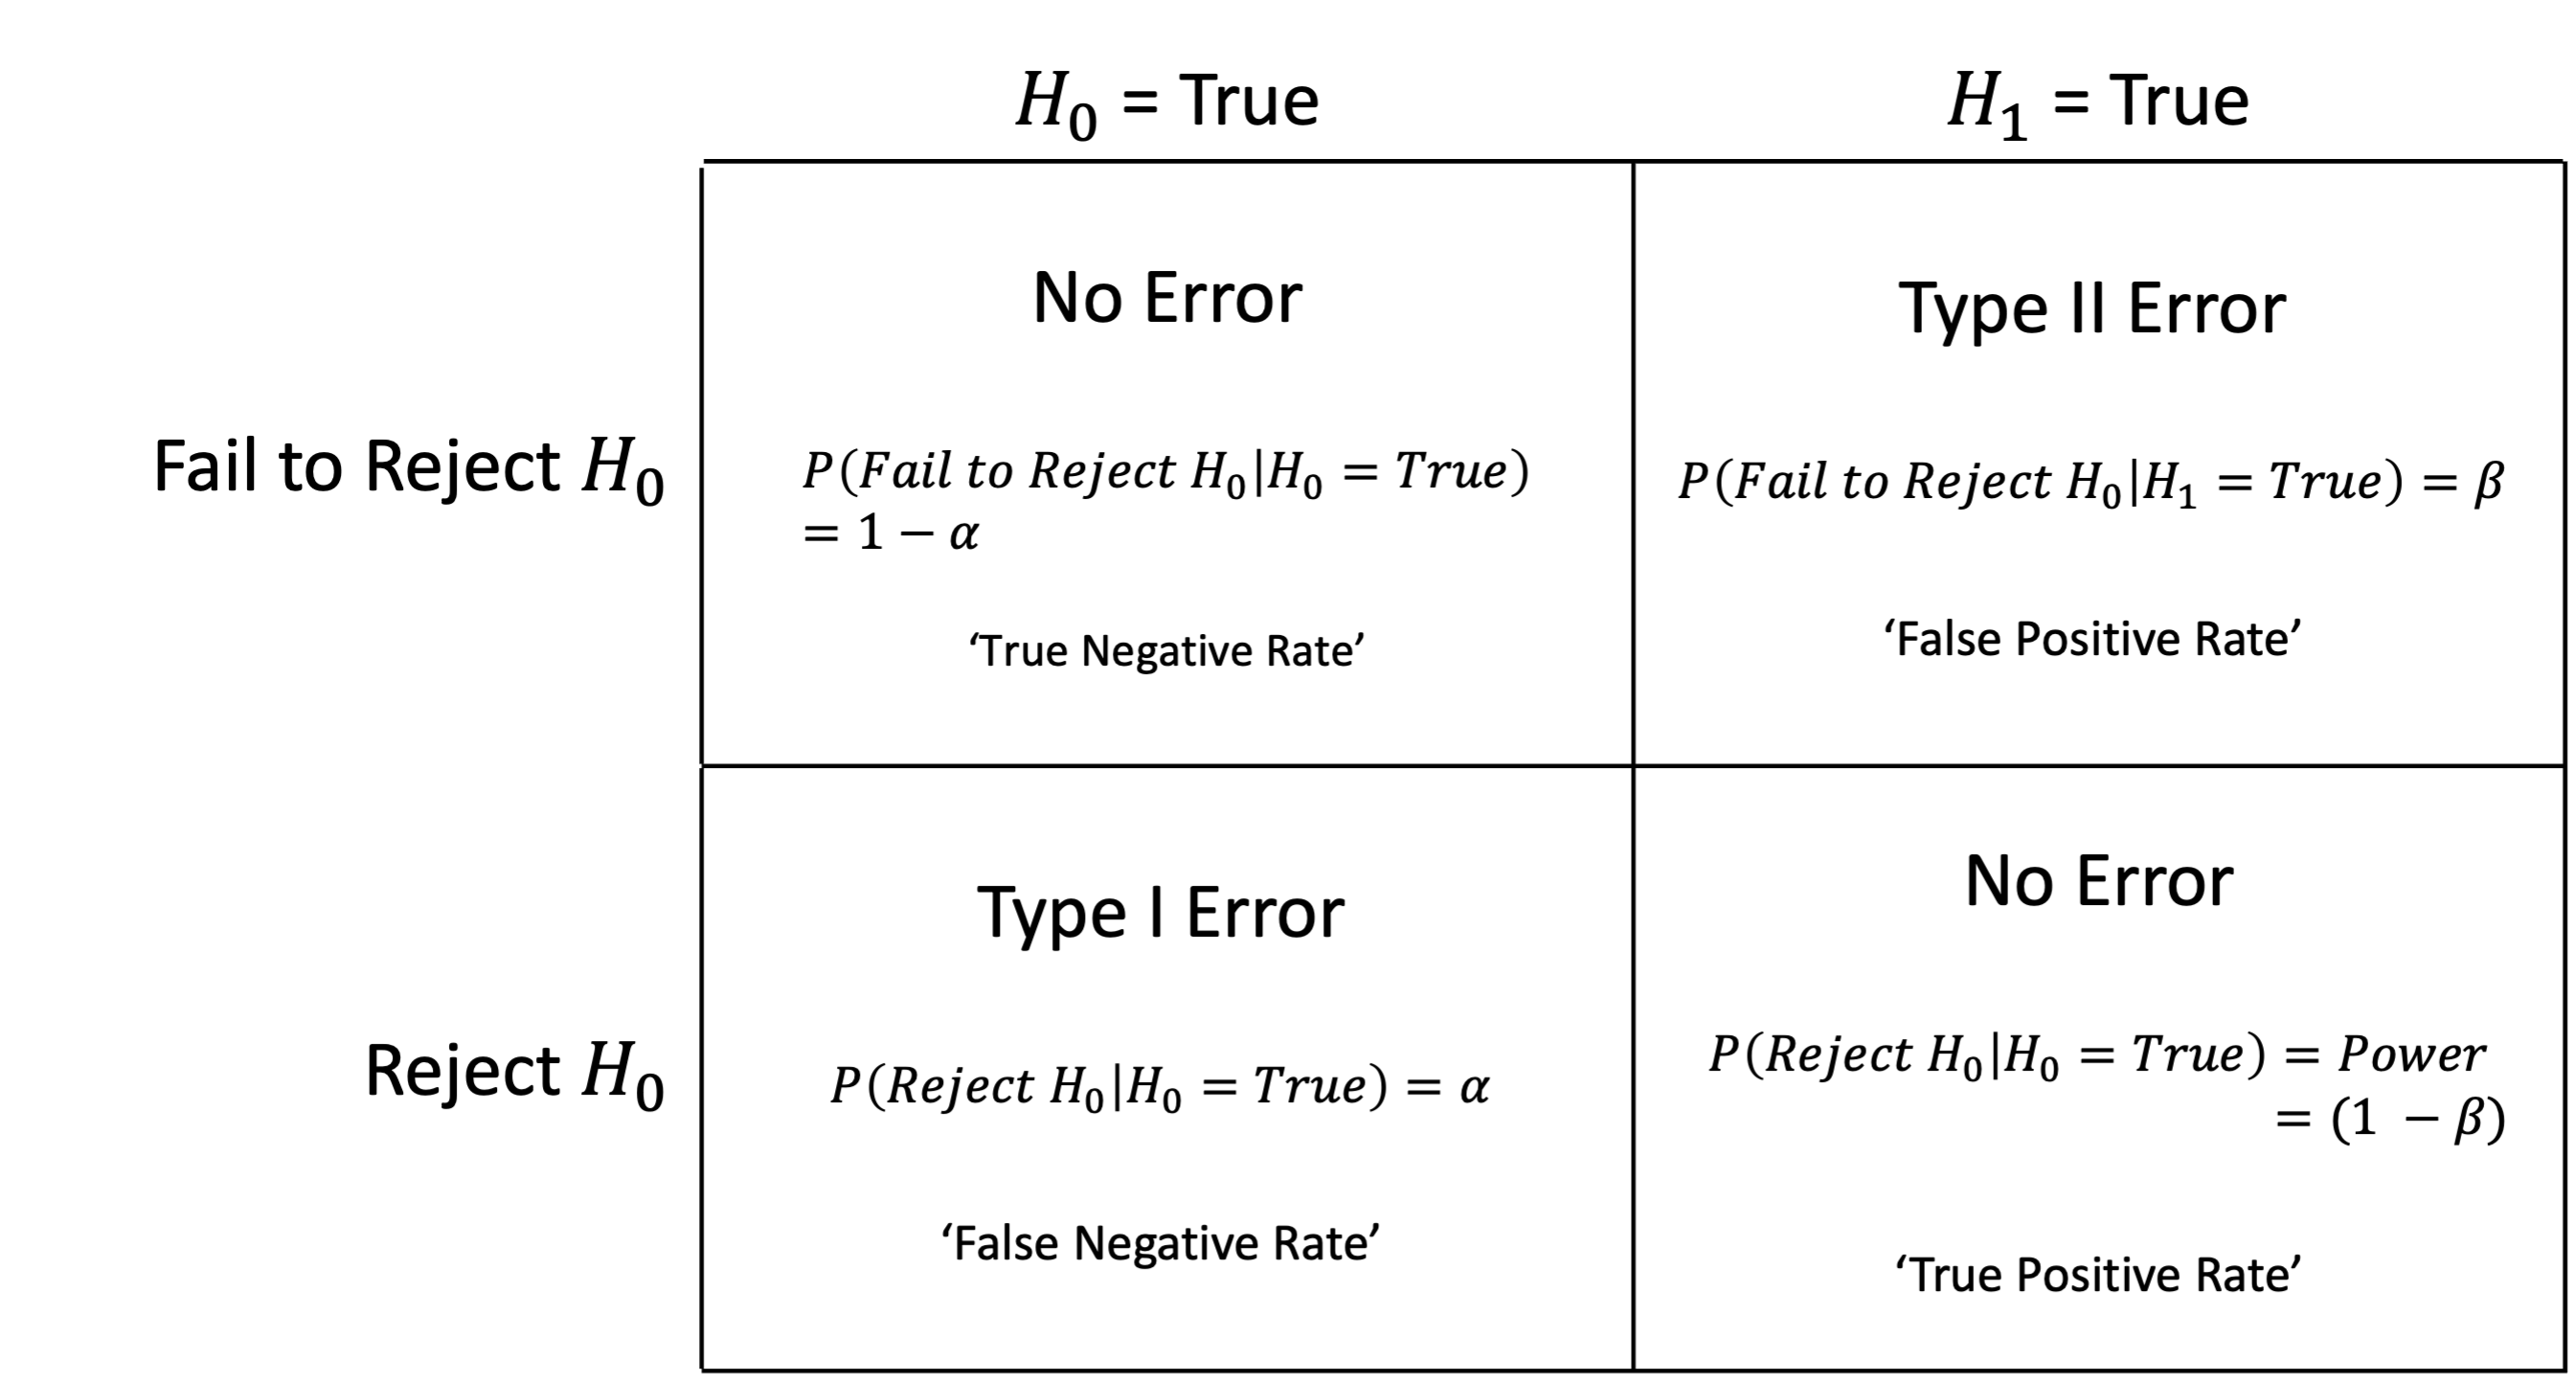

In [5]:
from IPython.display import Image
Image(filename="confusion_matrix.png", width=800, height = 400)

---
## Monte Carlo Simulation 
Let us now pretend that we have a situation in which 

### Test Samples:
We start our example with A/B samples drawn from two different Gamma distributions:

$$
\begin{align}
X_A &\sim Gamma(\kappa=0.5, \theta=1) \\
X_B &\sim Gamma(\kappa=0.5, \theta=0.75)
\end{align}
$$

We know that the mean of a Gamma distribution is the product of the shape and scale parameters ($\kappa, \theta$), so we can retrieve the true means:

$$
\begin{align}
\mu_A &= 0.5 \\
\mu_B &= 0.375
\end{align}
$$

The difference between the two means is therefore: 
$$ \mu_A - \mu_B = 0.125 $$

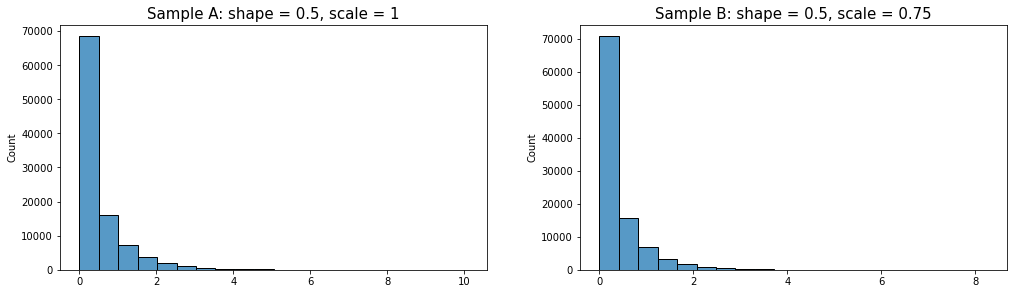

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sample_A = np.random.gamma(0.5, 1, 100000)
sample_B = np.random.gamma(0.5, 0.75, 100000)

mu_A = 0.5
mu_B = 0.375

fig, axes = plt.subplots(1, 2, figsize = (15,5))
sns.histplot(sample_A, bins = 20, ax = axes[0])
sns.histplot(sample_B, bins = 20, ax = axes[1])

axes[0].set_title("Sample A: shape = 0.5, scale = 1", fontsize = 15)
axes[1].set_title("Sample B: shape = 0.5, scale = 0.75", fontsize = 15)
plt.tight_layout(pad = 4)

In [7]:
"""Function for calculating the test statistic for Welch's t-test for a given sample size N"""
def test_statistic(N):
    x_A = np.random.choice(sample_A, size = N, replace=False)
    x_B = np.random.choice(sample_B, size = N, replace=False)

    meanA = np.average(x_A)
    meanB = np.average(x_B)

    sample_sd_A = np.std(x_A, ddof=1)
    sample_sd_B = np.std(x_B, ddof=1)

    test_statistic = (meanA - meanB) / np.sqrt( (sample_sd_A**2)/N + (sample_sd_B**2)/N)

    return(np.round(test_statistic, decimals=6))


Monte Carlo simulation to retrieve 20,000 realizations of the test statistic when sample sizes are {50, 100, 500, 1000}:

In [8]:
t_vec_50 = [test_statistic(x) for x in np.repeat(50, 20000)]
t_vec_100 = [test_statistic(x) for x in np.repeat(100, 20000)]
t_vec_500 = [test_statistic(x) for x in np.repeat(500, 20000)]
t_vec_1000 = [test_statistic(x) for x in np.repeat(1000, 20000)]

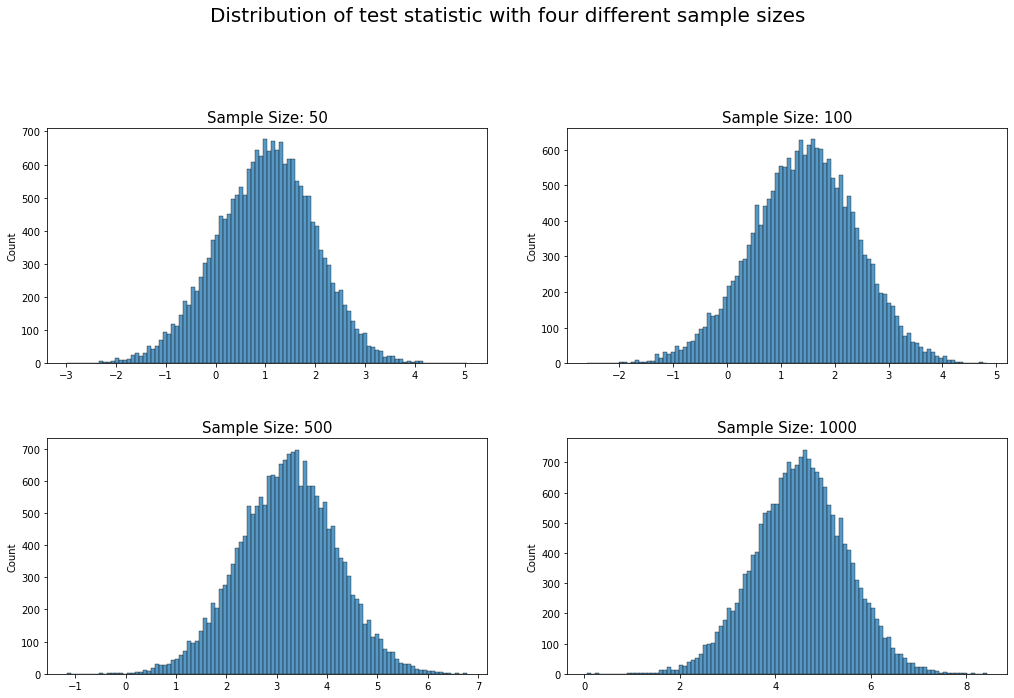

In [9]:
fig, axes = plt.subplots(2, 2, figsize = (15,10))
sns.histplot(t_vec_50, bins = 100, ax = axes[0,0])
sns.histplot(t_vec_100, bins = 100, ax = axes[0,1])
sns.histplot(t_vec_500, bins = 100, ax = axes[1,0])
sns.histplot(t_vec_1000, bins = 100, ax = axes[1,1])

plt.suptitle(t="Distribution of test statistic with four different sample sizes", fontsize = 20, va='bottom')
axes[0,0].set_title("Sample Size: 50", fontsize = 15)
axes[0,1].set_title("Sample Size: 100", fontsize = 15)
axes[1,0].set_title("Sample Size: 500", fontsize = 15)
axes[1,1].set_title("Sample Size: 1000", fontsize = 15)
plt.tight_layout(pad = 4)

Below we can see more clearly that the mean of the distributions is moving to the right as sample size increases.

Our test statistic for the four different sample size choices follows a normal distribution, as expected. 

However, as $N$ increases, the test statistic is centered further and further away from zero, which is the value that we would expect if $H_0$ were true. Therefore as N increases, it becomes increasingly apparent that Sample A and Sample B do not have the same real mean:
* The smallest sample size ($N = 50$) is centered just right of 0
* The next sample size ($N = 100$) is centered further right to that one, and so forth
* The center of the normal distribution with ($N=1000$) is furthest away from 0 

The boxplot below depicts this lurch away from zero clearly.

[Text(0.5, 1.0, 'Distributions of the Test Statistic with Varying Sample Sizes'),
 Text(0.5, 0, 'Sample Size'),
 Text(0, 0.5, 'Value')]

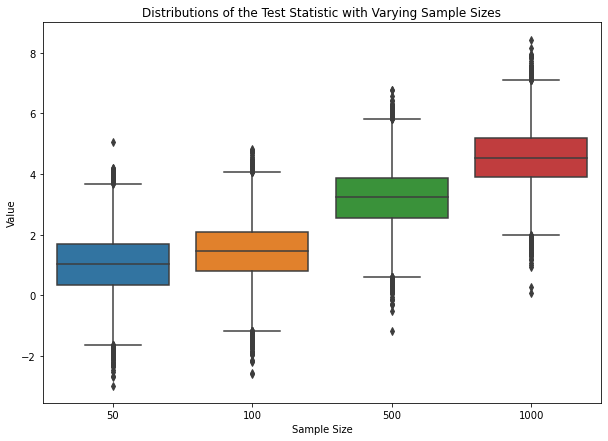

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.concat(axis=0, ignore_index=True, objs= [
    pd.DataFrame.from_dict({'value': t_vec_50, 'sample_size': 50}),
    pd.DataFrame.from_dict({'value': t_vec_100, 'sample_size': 100}),
    pd.DataFrame.from_dict({'value': t_vec_500, 'sample_size': 500}),
    pd.DataFrame.from_dict({'value': t_vec_1000, 'sample_size': 1000})
])

fig, axes = plt.subplots(figsize = (10,7))
sns.boxplot(data=df, x='sample_size', y='value', ax = axes).set(title='Distributions of the Test Statistic with Varying Sample Sizes', xlabel='Sample Size', ylabel='Value')

We can also use the formula above to calculate the theoretical means of the four normal distributions (with different sample sizes):

$$
\begin{align}
t \sim N \left(\dfrac{\Delta d}{\sqrt{ \dfrac{s^2_A}{N_A} + \dfrac{s^2_B}{N_B}}}, 1 \right)
\end{align}
$$

And we know that the true difference in the means $\Delta d = \mu_a - \mu_b = 0.125$

We also know that the the variance of a Gamma distribution $\sigma^2 = \kappa \theta^2$ so for sample A we have:

$$
\begin{align}
\sigma^2_A &= 0.5 \\
\sigma^2_B &= 0.5 \cdot 0.75^2 = 0.28125
\end{align}
$$

Now we just plug these values into the formula above with the different values of $N \in \{50, 100, 500, 1000\}$

In [11]:
def theoretical_mean(N):
    deltad = 0.125
    varA = 0.5
    varB = 0.5*(0.75**2)

    denominator = np.sqrt(varA/N + varB/N)
    return np.round(deltad / denominator, decimals = 6)

Our results when we compare the values of the theoretical means with our sample means for the t-distributions are below:

In [12]:
print(f"Mean of t-vector when N = 50: {np.mean(t_vec_50).round(decimals=6)} \t Theoretical Mean: {theoretical_mean(50)}")
print(f"Mean of t-vector when N = 100: {np.mean(t_vec_100).round(decimals=6)} \t Theoretical Mean: {theoretical_mean(100)}")
print(f"Mean of t-vector when N = 500: {np.mean(t_vec_500).round(decimals=6)} \t Theoretical Mean: {theoretical_mean(500)}")
print(f"Mean of t-vector when N = 1000: {np.mean(t_vec_1000).round(decimals=6)} \t Theoretical Mean: {theoretical_mean(1000)}")

Mean of t-vector when N = 50: 1.01449 	 Theoretical Mean: 1.0
Mean of t-vector when N = 100: 1.439772 	 Theoretical Mean: 1.414214
Mean of t-vector when N = 500: 3.216462 	 Theoretical Mean: 3.162278
Mean of t-vector when N = 1000: 4.538774 	 Theoretical Mean: 4.472136


And we can see above that the values above are very close to each other, validating our understanding of the test statistic's distribution. 

## Calculating Beta
Because we actually know that $H_1 = True$ (i.e. the true means for Sample A and Sample B are not the same), we are able to calculate the value for Beta in our case: 

First insert our knowledge that $P(H_1 = True) = 1$ into the equation for $\beta$:

$$
\begin{align}
\beta &= P(\text{Fail to Reject $H_0$} | H_1 = True) \\
&= \dfrac{P(\text{Fail to Reject $H_0$} \cap H_1 = True)}{P(H_1 = True)} \\
&= P(\text{Fail to Reject $H_0$} \cap H_1 = True) \\
&= P(\text{Fail to Reject $H_0$}) 
\end{align}
$$

The last line is true because the second term on the RHS below is equal to zero:

$$
\begin{align}
P(\text{Fail to Reject $H_0$}) &= P(\text{Fail to Reject $H_0$} \cap H_1 = True) + P(\text{Fail to Reject $H_0$} \cap H_1 = False) 
\end{align}
$$

Therefore, beta is simply the probability that the t-statistic falls within the 5% significance critical value thresholds $(-1.96, 1.96)$

$$
\begin{align}
\beta &= P(\text{Fail to Reject $H_0$}) \\
&= P(\alpha_{0.025} \le t \le \alpha_{0.975}) \\
&\approx P(-1.96 \le t \le 1.96)
\end{align}
$$

And we have written a function below to calculate this, with the values for the simulated t-statistics as an input argument. 

In [13]:
"""Function for calculating the Betas"""
def calc_betas(t_vector):
    N = len(t_vector)
    critical_region = ((t_vector >= critical_level_lower) & (t_vector <= critical_level_upper))

    beta = sum(critical_region) / N
    return beta

In [14]:
beta50 = calc_betas(t_vec_50)
beta100 = calc_betas(t_vec_100)
beta500 = calc_betas(t_vec_500)
beta1000 = calc_betas(t_vec_1000)
print(f"Beta when N = 50: {beta50} \n Beta when N = 100: {beta100} \n Beta when N = 500: {beta500} \n Beta when N = 1000: {beta1000}")

Beta when N = 50: 0.83405 
 Beta when N = 100: 0.6982 
 Beta when N = 500: 0.0971 
 Beta when N = 1000: 0.00435


[Text(0.5, 1.0, 'Power of two-sample t-test as a function of sample size'),
 Text(0.5, 0, 'Sample Size'),
 Text(0, 0.5, 'Power'),
 None]

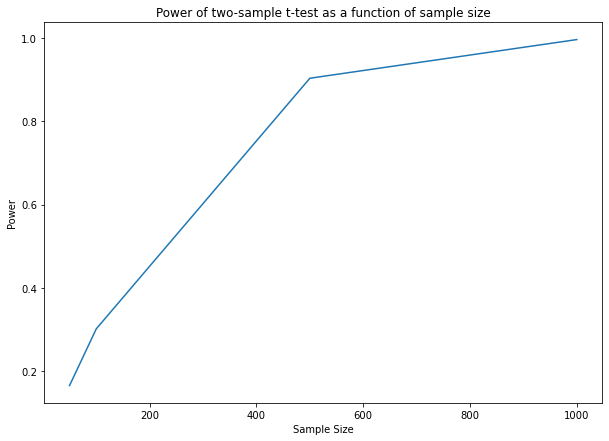

In [15]:
fig, axes = plt.subplots(figsize = (10,7))
sns.lineplot(x=[50, 100, 500, 1000], y = [1-beta50, 1-beta100, 1-beta500, 1-beta1000]).set(title='Power of two-sample t-test as a function of sample size', xlabel = 'Sample Size', ylabel = 'Power', axes=axes)

In [16]:
t_list = []

def get_t_vectors(sample_size):
    t_vector = [test_statistic(x) for x in np.repeat(sample_size, 20000)]
    print(f"Completed Sample Size: {sample_size}")
    return t_vector

In [17]:
%timeit 
t_list = [get_t_vectors(x) for x in np.arange(50, 1000, 50)]

Completed Sample Size: 50
Completed Sample Size: 100
Completed Sample Size: 150
Completed Sample Size: 200
Completed Sample Size: 250
Completed Sample Size: 300
Completed Sample Size: 350
Completed Sample Size: 400
Completed Sample Size: 450
Completed Sample Size: 500
Completed Sample Size: 550
Completed Sample Size: 600
Completed Sample Size: 650
Completed Sample Size: 700
Completed Sample Size: 750
Completed Sample Size: 800
Completed Sample Size: 850
Completed Sample Size: 900
Completed Sample Size: 950


In [18]:
beta_vec = [calc_betas(x) for x in t_list]
power_vec = 1 - np.array(beta_vec)

[Text(0.5, 1.0, 'Power of two-sample t-test as a function of sample size'),
 Text(0.5, 0, 'Sample Size'),
 Text(0, 0.5, 'Power'),
 None]

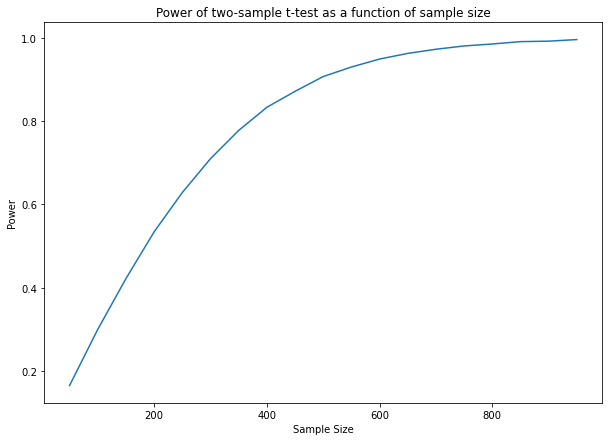

In [19]:
fig, axes = plt.subplots(figsize = (10,7))
sns.lineplot(x=np.arange(50,1000,50), y = power_vec).set(title='Power of two-sample t-test as a function of sample size', xlabel = 'Sample Size', ylabel = 'Power', axes=axes)

## Conclusion on the Sample Size to Detect the MDE with 90% Power

Our simulation results returned that if we wanted to detect a difference in the means of Samples A and B equal to a magnitude of 0.125 with a power of 90%, we would need close to 500 samples in our experiment.

We conclude by performing the two sample t-test with a sample size of 500. 

Given that this test is 90% power, we should observe that if we ran the test 10 times consecutively, about 9 times out of 10 we would find significance, and approximately 1 times out of 10 we would fail to find significance. 

In [20]:
from scipy import stats as st

for i in range(10):
    a = np.random.choice(sample_A, size = 500)
    b = np.random.choice(sample_B, size = 500)

    t_stat, pvalue = st.ttest_ind(a, b, equal_var = False)
    print(f"P-value on trial {i+1}: {pvalue}")

P-value on trial 1: 0.025034446432089155
P-value on trial 2: 0.00032664775442880177
P-value on trial 3: 0.003326740979716019
P-value on trial 4: 0.0013414503833473388
P-value on trial 5: 4.0520480876204076e-06
P-value on trial 6: 0.00028836833099666725
P-value on trial 7: 4.1152070329026673e-07
P-value on trial 8: 8.903893135205293e-06
P-value on trial 9: 0.0013478846250617397
P-value on trial 10: 4.981302574850091e-05


Surely enough, we failed to reject the null hypothesis on trials 2 and 8 (i.e. would have wrongly concluded that there was no difference in the means), but correctly rejected the null hypothesis 8 times out of 10. 

---
## Bayesian Approach to Hypothesis Testing

In [21]:
test = sample_A - sample_B

<AxesSubplot:ylabel='Count'>

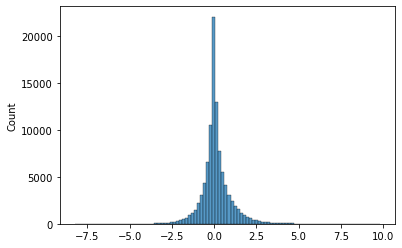

In [22]:
sns.histplot(test, bins=100)

In [23]:
np.mean(test)

0.12695665715483298